In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [191]:
ratings = pd.read_csv('final_cccf.csv')
ratings

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
...,...,...,...,...,...
11270,TeaPot,teapot,2677.0,NaN,NaN
11271,luosiyuan,tianbu,2882.0,NaN,NaN
11272,dorijanko,dorijanlendvaj,3120.0,NaN,NaN
11273,gamegame,gamegame,3218.0,NaN,NaN


In [192]:
ratings.shape

(11275, 5)

In [193]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    7437 non-null   float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    10280 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [194]:
ratings.isnull().sum()

ss_username       0
cf_username     207
cf_rating      3838
cc_username     995
cc_rating       995
dtype: int64

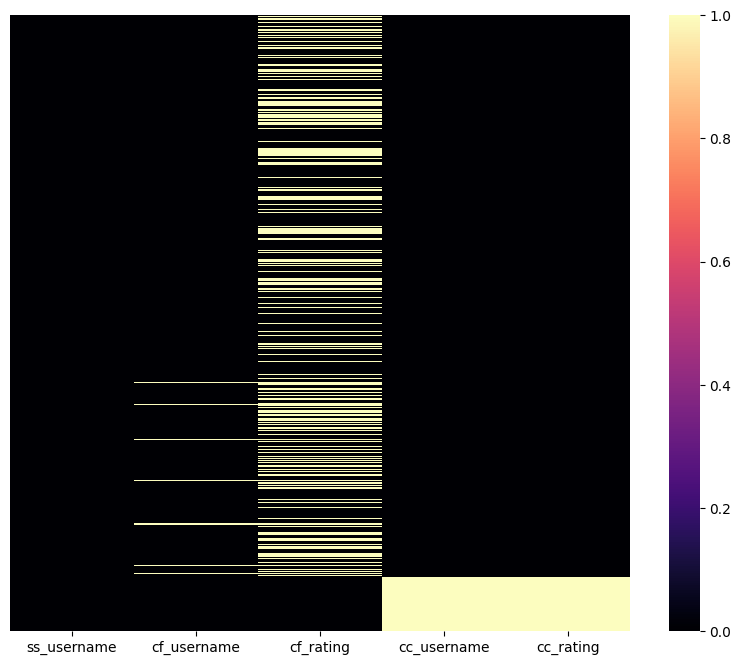

In [195]:
plt.figure(figsize=(10,8))
sns.heatmap(ratings.isnull(),yticklabels=False,cmap='magma')
plt.show()

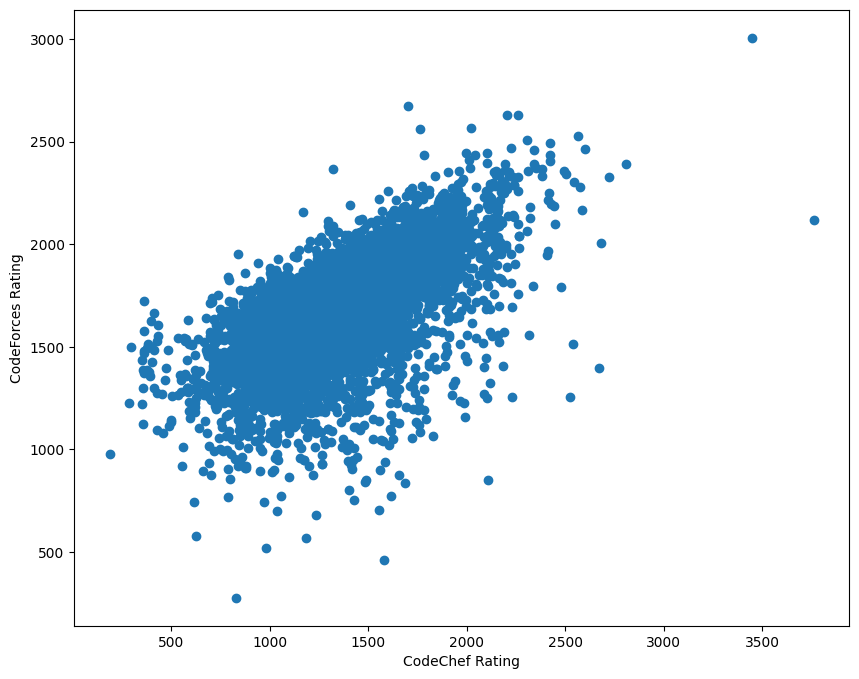

In [196]:
plt.figure(figsize=(10,8))
plt.scatter(x=ratings['cf_rating'],y=ratings['cc_rating'])
plt.xlabel('CodeChef Rating')
plt.ylabel('CodeForces Rating')
plt.show()

In [197]:
ratings = ratings[['cc_rating','cf_rating']].dropna()
ratings

,cc_rating,cf_rating
0,3007.0,3449.0
4,2673.0,1703.0
5,2628.0,2202.0
6,2628.0,2262.0
7,2565.0,2023.0
...,...,...
10269,580.0,624.0
10270,569.0,1182.0
10272,518.0,979.0
10274,460.0,1581.0


In [198]:
ratings.shape

(6442, 2)

In [199]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cc_rating  6442 non-null   float64
 1   cf_rating  6442 non-null   float64
dtypes: float64(2)
memory usage: 151.0 KB


<Axes: >

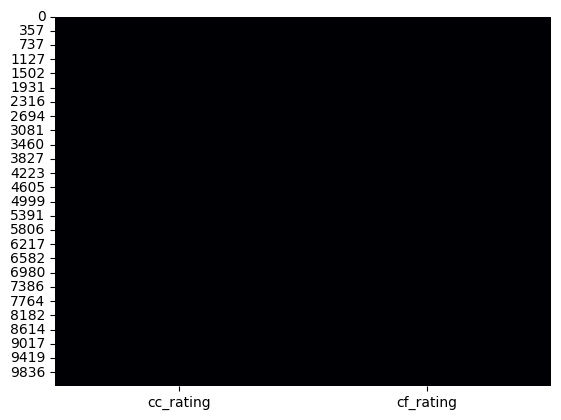

In [200]:
sns.heatmap(ratings.isnull(), cbar=False, cmap='magma')


In [201]:
cc_rating =np.array(ratings['cc_rating'])
cf_rating = np.array(ratings['cf_rating'])


In [202]:
def compute_cost(x,y,w,b):
    cost =0
    m=x.shape[0]
    for i in range(m):
        fx = w*x[i]+b
        cost = cost+(fx-y[i])**(2)
    total_cost = cost/(2*m)
    return total_cost

In [203]:
def derivative(x,y,w,b):
    m = x.shape[0]
    fx =w*x+b
    error = fx-y
    dw = np.dot(error,x)/m
    db = np.sum(error)/m
    return dw,db


In [204]:
def grad_des(x,y,w,b,n,gradient_function,alpha):
    for i in range(n):
        dw,db=gradient_function(x,y,w,b)
        b=b-alpha*db
        w=w-alpha*dw

    return w,b


In [205]:
x_mean = np.mean(cc_rating)
x_std = np.std(cc_rating)
y_mean = np.mean(cf_rating)
y_std = np.std(cf_rating)

cc_scaled = (cc_rating-x_mean)/x_std
cf_scaled = (cf_rating-y_mean)/y_std


In [206]:
w_init=0
b_init=0
iterations=10000
alpha=0.01
w_final,b_final=grad_des(cc_scaled,cf_scaled,w_init,b_init,iterations,derivative,alpha)

In [207]:
W = (w_final*y_std)/x_std
B = y_mean+y_std*b_final-W*x_mean
y_pred = W*cc_rating+B

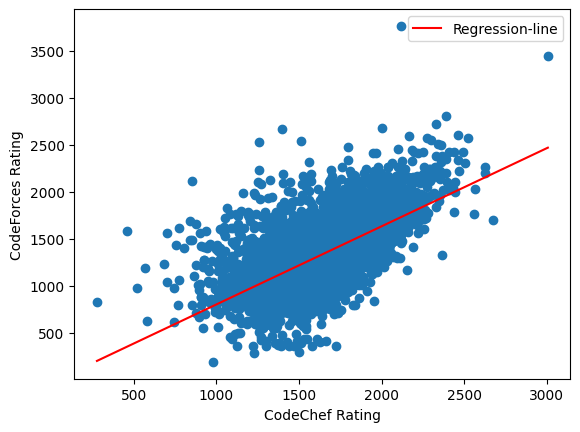

In [208]:
plt.scatter(cc_rating,cf_rating)
plt.plot(cc_rating,y_pred,color='red',label='Regression-line')
plt.xlabel('CodeChef Rating')
plt.ylabel('CodeForces Rating')
plt.legend()
plt.show()

In [209]:
print("Real-world Coefficient (W):", W)
print("Real-world Intercept (B):", B)

Real-world Coefficient (W): 0.8315620555789264
Real-world Intercept (B): -32.62926507314614
